In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Webscrapping Wikipedia table to get the CAC40 components
page = requests.get("https://en.wikipedia.org/wiki/EURO_STOXX_50")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find_all(class_="wikitable sortable")[1]

In [3]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Main listing,Name,Corporate form,Registered office,Industry,Founded
0,ADS.DE,FWB: ADS,Adidas,Aktiengesellschaft,Germany,Sportwear,1924
1,ADYEN.AS,Euronext: ADYEN,Adyen,Naamloze vennootschap,Netherlands,Software—Infrastructure,2006
2,AD.AS,Euronext: AD,Ahold Delhaize,Naamloze vennootschap,Netherlands,Retail,2016 (1867)
3,AI.PA,Euronext Paris: AI,Air Liquide,Société Anonyme,France,Chemistry,1902
4,AIR.PA,Euronext: AIR,Airbus,Societas Europaea,France,Aerospace,1970
5,ALV.DE,FWB: ALV,Allianz,Societas Europaea,Germany,Insurance,1890
6,ABI.BR,Euronext: ABI,Anheuser-Busch InBev,Société Anonyme/ Naamloze vennootschap,Belgium,Food and beverage,2008 (1366/1888/1852/1895)
7,ASML.AS,Euronext: ASML,ASML Holding,Naamloze vennootschap,Netherlands,Technology,1984
8,CS.PA,Euronext: CS,AXA,Société Anonyme,France,Insurance,1816
9,BAS.DE,FWB: BAS,BASF,Societas Europaea,Germany,Chemistry,1865


In [4]:
# Get the data for the stock ^Euro stoxx50
eur50_list = wiki['Ticker'].tolist()
eur50_list.append('^STOXX50E')

In [5]:
# Save all the historical data
for stock in tqdm(eur50_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

100%|██████████| 51/51 [00:25<00:00,  1.97it/s]


In [6]:
# Configuration of different parameters of the notebook
ticker = '^STOXX50E'
year = '2024'

In [7]:
# Check DataFrame
stock_eu = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_eu.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-30,4177.669922,4207.759766,4160.350098,4181.029785,4181.029785,0
2007-04-02,4177.310059,4191.759766,4163.770020,4189.549805,4189.549805,0
2007-04-03,4199.540039,4248.069824,4199.540039,4246.299805,4246.299805,0
2007-04-04,4252.709961,4261.830078,4242.049805,4261.830078,4261.830078,0
2007-04-05,4259.979980,4274.169922,4253.790039,4271.540039,4271.540039,0
2007-04-10,4275.680176,4307.660156,4267.009766,4301.470215,4301.470215,0
2007-04-11,4298.240234,4326.700195,4284.919922,4293.200195,4293.200195,0
2007-04-12,4290.109863,4291.100098,4249.299805,4280.020020,4280.020020,0
2007-04-13,4285.560059,4319.279785,4284.029785,4317.350098,4317.350098,0


In [8]:
# Check DataFrame tail
stock_eu.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,4720.299805,4746.350098,4720.299805,4746.350098,4746.350098,21602800
2024-02-13,4746.459961,4746.459961,4671.990234,4689.279785,4689.279785,22710500
2024-02-14,4685.939941,4712.890137,4681.620117,4709.220215,4709.220215,20156500
2024-02-15,4713.779785,4749.270020,4713.779785,4743.169922,4743.169922,26284000
2024-02-16,4754.430176,4782.790039,4750.759766,4765.649902,4765.649902,28820000
2024-02-19,4755.750000,4765.819824,4744.589844,4763.069824,4763.069824,17297200
2024-02-20,4757.950195,4766.620117,4749.180176,4760.279785,4760.279785,20499400
2024-02-21,4761.240234,4782.560059,4756.680176,4775.310059,4775.310059,27017300
2024-02-22,4812.020020,4866.060059,4812.020020,4855.359863,4855.359863,29131200


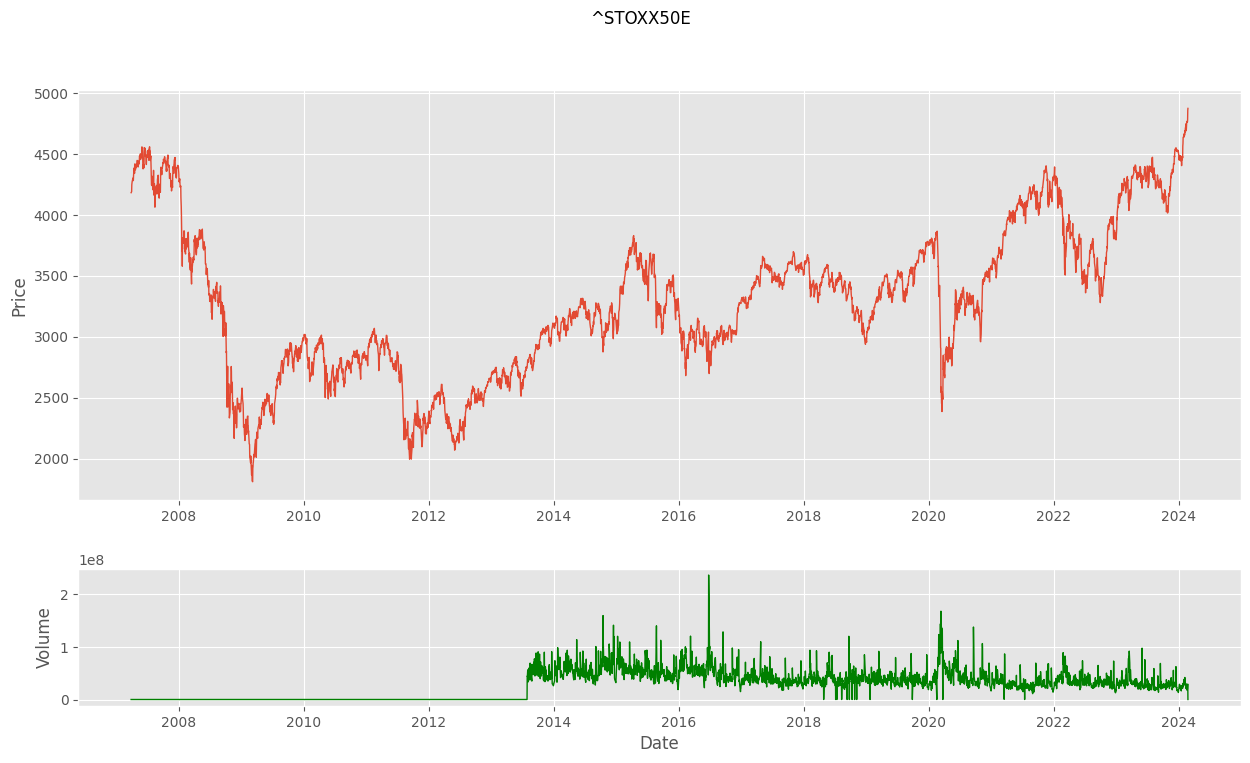

In [9]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_eu['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_eu['Volume'],linewidth=1,color='g')

plt.show()

In [10]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_eu.index,y=stock_eu['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_eu.index,y=stock_eu['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [11]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_eu['MMA20'] = stock_eu['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_eu["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_eu['BB_Upper'] = indicator_bb.bollinger_hband()
stock_eu['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_eu["Adj Close"].loc[year], window=14)

# RSI
stock_eu['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_eu['Daily_Return'] = daily_return(stock_eu["Adj Close"].loc[year])

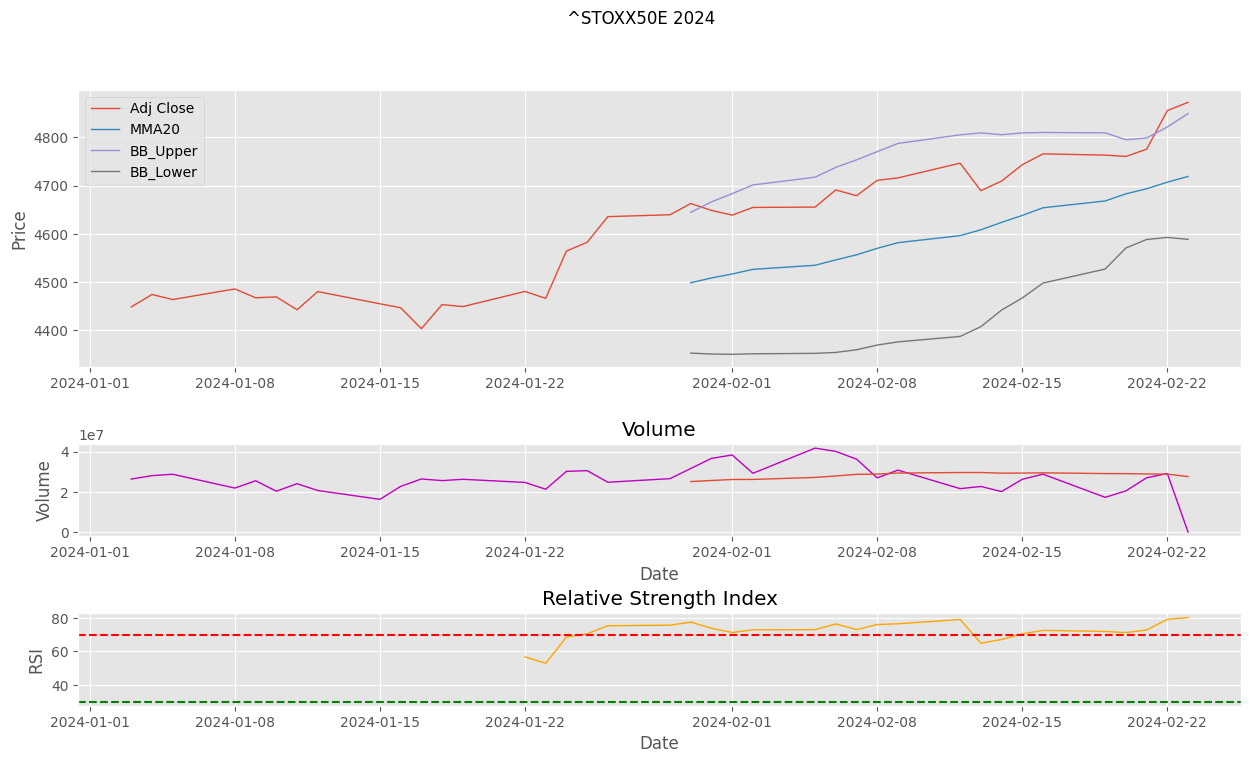

In [12]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_eu['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_eu['MMA20'],linewidth=1) 
axs[0].plot(stock_eu['BB_Upper'],linewidth=1)
axs[0].plot(stock_eu['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_eu['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_eu['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_eu['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [13]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_eu['Adj Close'].loc[year].index,y=stock_eu['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_eu['BB_Lower'].loc[year].index,y=stock_eu['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_eu['BB_Upper'].loc[year].index,y=stock_eu['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_eu['MMA20'].loc[year].index,y=stock_eu['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_eu['Volume'].loc[year].index,y=stock_eu['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_eu['Volume'].loc[year].index,y=stock_eu['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_eu['RSI'].loc[year].index,y=stock_eu['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [14]:
stock_eu.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-02-12,4720.299805,4746.350098,4720.299805,4746.350098,4746.350098,21602800,4596.056982,4805.136608,4386.977357,79.059915,0.646328
2024-02-13,4746.459961,4746.459961,4671.990234,4689.279785,4689.279785,22710500,4608.195483,4809.168470,4407.222497,64.863560,-1.202404
2024-02-14,4685.939941,4712.890137,4681.620117,4709.220215,4709.220215,20156500,4623.502490,4805.380627,4441.624353,67.087343,0.425234
2024-02-15,4713.779785,4749.270020,4713.779785,4743.169922,4743.169922,26284000,4638.008496,4809.155203,4466.861789,70.509522,0.720920
2024-02-16,4754.430176,4782.790039,4750.759766,4765.649902,4765.649902,28820000,4653.849487,4810.016763,4497.682211,72.545171,0.473944
2024-02-19,4755.750000,4765.819824,4744.589844,4763.069824,4763.069824,17297200,4667.986987,4809.238713,4526.735261,71.931463,-0.054139
2024-02-20,4757.950195,4766.620117,4749.180176,4760.279785,4760.279785,20499400,4682.705469,4795.053581,4570.357357,71.229723,-0.058576
2024-02-21,4761.240234,4782.560059,4756.680176,4775.310059,4775.310059,27017300,4693.265479,4798.518419,4588.012538,72.770832,0.315743
2024-02-22,4812.020020,4866.060059,4812.020020,4855.359863,4855.359863,29131200,4706.920483,4821.475314,4592.365653,79.170373,1.676327


  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:00<00:00, 56.97it/s]


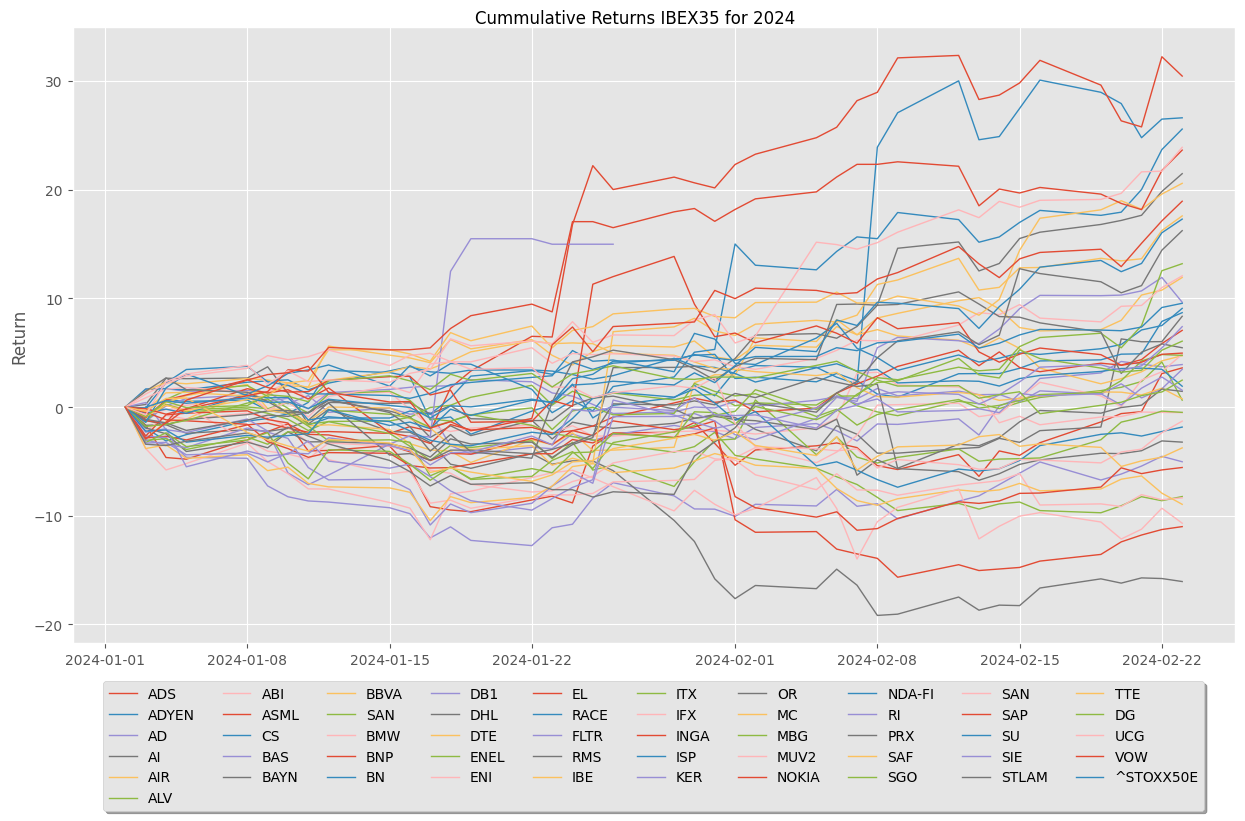

In [15]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(eur50_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [16]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(eur50_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns IBEX35 for {year}")

fig.show()

  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:00<00:00, 57.30it/s]


In [17]:
# Create also table of cummulative returns
list = []

for stock in tqdm(eur50_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name','Registered office']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


100%|██████████| 51/51 [00:00<00:00, 63.92it/s]


,Ticker,Name,Registered office,Date,Cummulative_Return
0,ASML.AS,ASML Holding,Netherlands,2024-02-23,30.443254
1,ADYEN.AS,Adyen,Netherlands,2024-02-23,26.604558
2,RACE.MI,Ferrari,Netherlands,2024-02-23,25.569293
3,UCG.MI,UniCredit,Italy,2024-02-23,23.891328
4,SAP.DE,SAP,Germany,2024-02-23,23.634781
5,RMS.PA,Hermès,France,2024-02-23,21.465732
6,SAF.PA,Safran,France,2024-02-23,20.577213
7,VOW.DE,Volkswagen Group,Germany,2024-02-23,18.931433
8,MC.PA,LVMH Moët Hennessy Louis Vuitton,France,2024-02-23,17.579526
9,SU.PA,Schneider Electric,France,2024-02-23,17.285329
